# <center> 
# <center> 3b. AR(1) Simulation
## <center> ECO374

Load Python packages

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 1. Simulation
Simulate and plot AR(1) processes

In [2]:
np.random.seed(684984)
n = 200
c = 1

# Python requires us to specify the zero-lag value which is 1. 
# The AR model parameters need to be negated.
phi = 0.4
y_sim1 = pd.DataFrame({'y1':c/(1-phi)+arma_generate_sample(ar=[1,-phi],ma=[1], 
                      nsample=n, distrvs=np.random.normal)})
phi = 0.7
y_sim2 = pd.DataFrame({'y2':c/(1-phi)+arma_generate_sample(ar=[1,-phi],ma=[1], 
                      nsample=n, distrvs=np.random.normal)})
phi = 0.95
y_sim3 = pd.DataFrame({'y3':c/(1-phi)+arma_generate_sample(ar=[1,-phi],ma=[1], 
                      nsample=n, distrvs=np.random.normal)})
y_sim4 = np.zeros(n)
wn = np.random.normal(size=n) 
y_sim4[0] = wn[0]
for i in range(1, n):
    y_sim4[i] = 1 + y_sim4[i-1] + wn[i]
y_sim4 = pd.DataFrame({'y4': y_sim4})

Set titles for plots

In [3]:
title1 = "AR(1) with $\\phi = 0.4$"
title2 = "AR(1) with $\\phi = 0.7$"
title3 = "AR(1) with $\\phi = 0.95$"
title4 = "AR(1) with $\\phi = 1$"

Plot the simulated draws

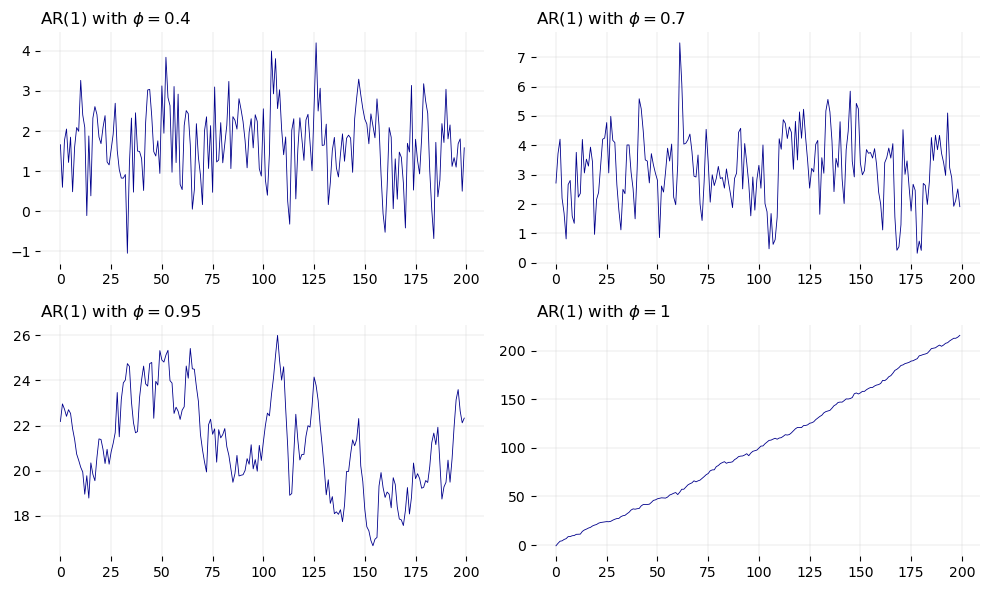

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flatten()

axs[0].plot(y_sim1['y1'], color='darkblue', linewidth=0.6)
axs[0].set_title(title1, loc='left')

axs[1].plot(y_sim2['y2'], color='darkblue', linewidth=0.6)
axs[1].set_title(title2, loc='left')

axs[2].plot(y_sim3['y3'], color='darkblue', linewidth=0.6)
axs[2].set_title(title3, loc='left')

axs[3].plot(y_sim4['y4'], color='darkblue', linewidth=0.6)
axs[3].set_title(title4, loc='left')

for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(color='lightgrey', linewidth=0.3)
    ax.set_frame_on(False)

fig.tight_layout() 
plt.show() 

## 2. Autocorrelation Function (ACF)

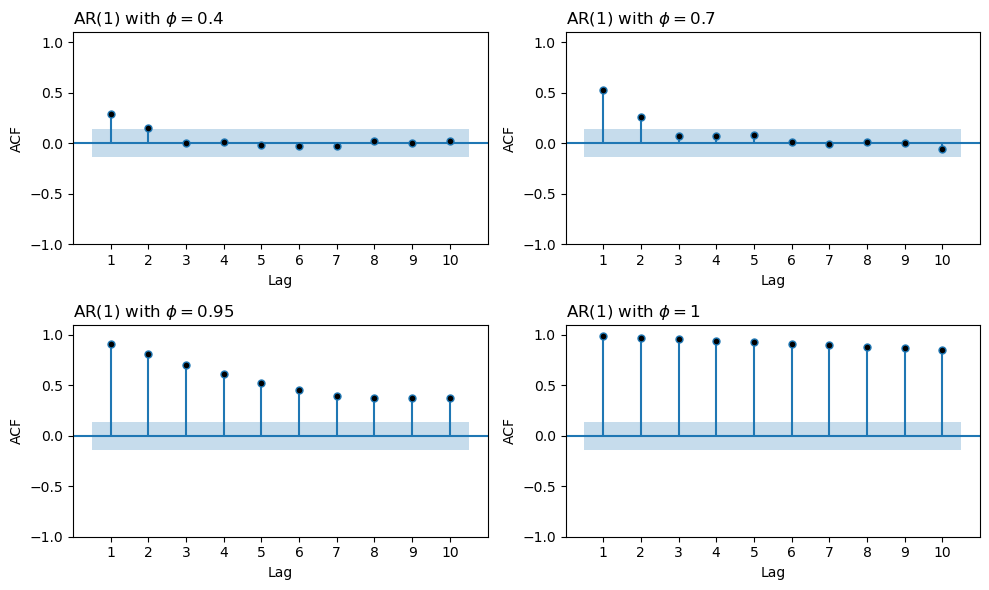

In [5]:
lag_max = 10

# initialize plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axs = axs.flatten()

# autocorrelation subplots
plot_acf(y_sim1['y1'], lags=lag_max, alpha=0.05, zero=False, mfc='black', 
         bartlett_confint=False, title=None, ax=axs[0])
axs[0].set_ylabel('ACF')
axs[0].set_title(title1, loc='left')

plot_acf(y_sim2['y2'], lags=lag_max, alpha=0.05, zero=False, mfc='black', 
         bartlett_confint=False, title=None, ax=axs[1])
axs[1].set_ylabel('ACF')
axs[1].set_title(title2, loc='left')

plot_acf(y_sim3['y3'], lags=lag_max, alpha=0.05, zero=False, mfc='black', 
         bartlett_confint=False, title=None, ax=axs[2])
axs[2].set_ylabel('ACF')
axs[2].set_title(title3, loc='left')

plot_acf(y_sim4['y4'], lags=lag_max, alpha=0.05, zero=False, mfc='black', 
         bartlett_confint=False, title=None, ax=axs[3])
axs[3].set_ylabel('ACF')
axs[3].set_title(title4, loc='left')

for ax in axs:
    ax.set_ylim(-1,1.1)
    ax.set_xticks(np.arange(1, lag_max+1, step=1))
    ax.set_xlabel('Lag')

fig.tight_layout() 
plt.show() 

## 3. Partial Autocorrelation Function (PACF)

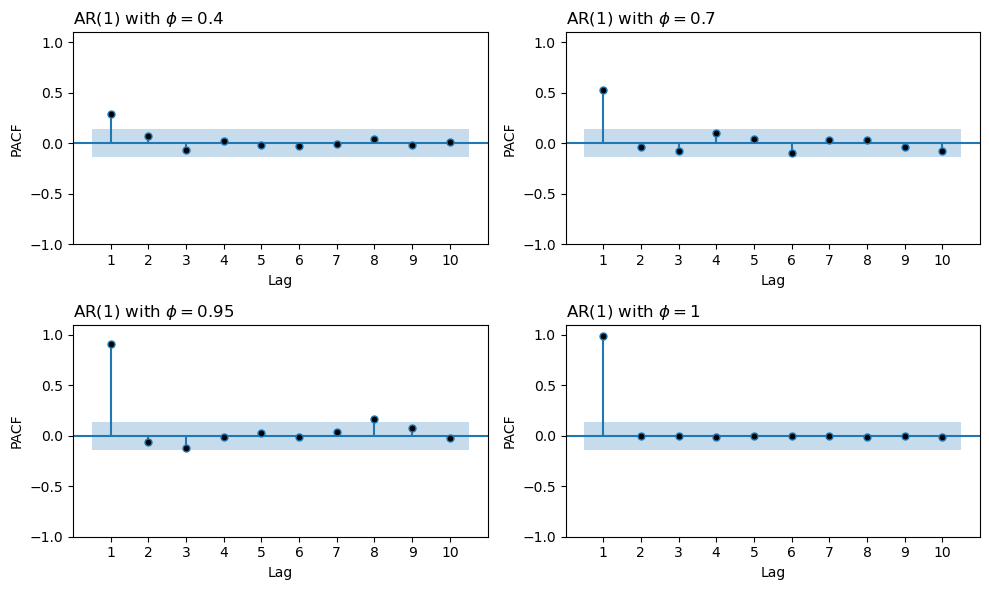

In [6]:
lag_max = 10

# initialize plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axs = axs.flatten()

# autocorrelation subplots
plot_pacf(y_sim1['y1'], lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[0])
axs[0].set_ylabel('PACF')
axs[0].set_title(title1, loc='left')

plot_pacf(y_sim2['y2'], lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[1])
axs[1].set_ylabel('PACF')
axs[1].set_title(title2, loc='left')

plot_pacf(y_sim3['y3'], lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[2])
axs[2].set_ylabel('PACF')
axs[2].set_title(title3, loc='left')

plot_pacf(y_sim4['y4'], lags=lag_max, alpha=0.05, zero=False, mfc='black', title=None, ax=axs[3])
axs[3].set_ylabel('PACF')
axs[3].set_title(title4, loc='left')

# For all subplots set y-limits, adjust x-ticks, add x-labels
for ax in axs:
    ax.set_ylim(-1,1.1)
    ax.set_xticks(np.arange(1, lag_max+1, step=1))
    ax.set_xlabel('Lag')

fig.tight_layout() # Adjust layout
plt.show() # Show the plot